# Base

In [7]:
import math

import IPython.display as ipd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import scipy.io as sio # type: ignore

def kaiser(wp,wr):
    wc = (wp + wr)/2
    d = 0.01
    Ap = 20*math.log10((1+d)/(1-d))
    Ar = -20*math.log10(d)

    if Ar < 21:
        b = 0
        D = .9222

    elif Ar < 50:
        b = 0.5842*(Ar-21)**0.4+0.07886*(Ar-21)
        D = (Ar - 7.95)/14.36
    else:
        b = .1102*(Ar-8.7)
        D = (Ar - 7.95)/14.36

    k = math.ceil(math.pi*D/(wr-wp)-.5)
    M = 2*k+1

    n = np.arange(-k,k+1,1)
    
    w = np.i0(b*np.sqrt(1-(4/M**2)*n**2))
    w = np.divide(w,np.i0(b))

    h = wc/math.pi*np.sinc(wc*n/math.pi)*w

    return h

def espectro(y):

    #modulo da transf. de Fourier
    Y = np.abs(np.fft.fft(y))
    #frequencias avaliadas
    w = np.linspace(0,2*math.pi,Y.size)

    #exibe o grafico do espectro
    plt.figure() 
    plt.plot(w,Y, 'g')
    plt.xlabel('$\Omega$ [rad]', fontsize=10)
    plt.ylabel('|$Y(e^{j\Omega})$|', fontsize=10)
    plt.grid(True)
    plt.xlim((0,2*math.pi))
    plt.show()
    
    return Y,w

Fs, y = sio.wavfile.read("creed_overcome.wav")
# Conversão para mono
y_mono=(y[:,0]+y[:,1])/2

C:\Users\ludiv\AppData\Local\Temp\ipykernel_5560\3097198492.py:55: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, y = sio.wavfile.read("creed_overcome.wav")


# Grafico a

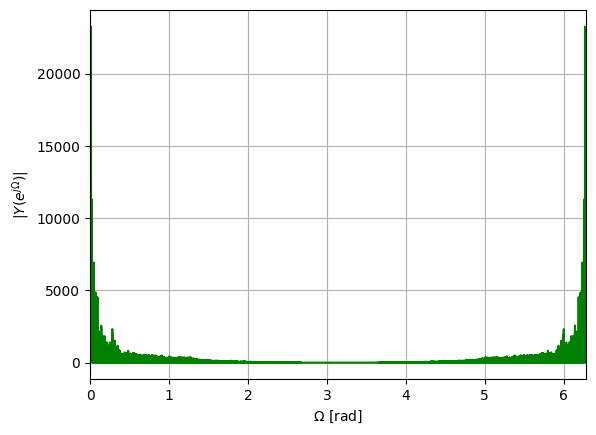

In [8]:
espectro(y_mono)
ipd.Audio(y_mono, rate=Fs)

# Grafico B

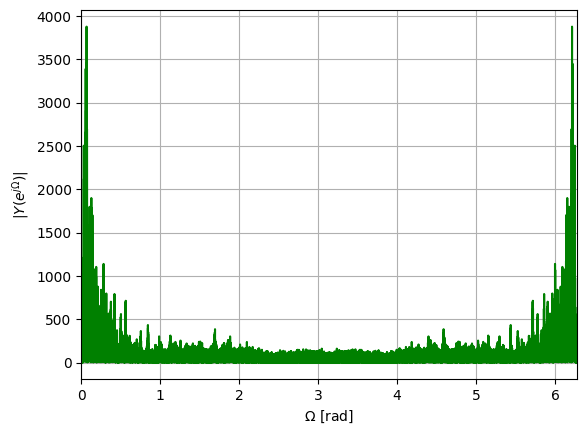

In [9]:
M = 6
# Pega tudo com um passo de M
y_dec = y_mono[::M]
Fs_dec = Fs // M

espectro(y_dec)
ipd.Audio(data=y_dec, rate=Fs_dec)

# Grafico C

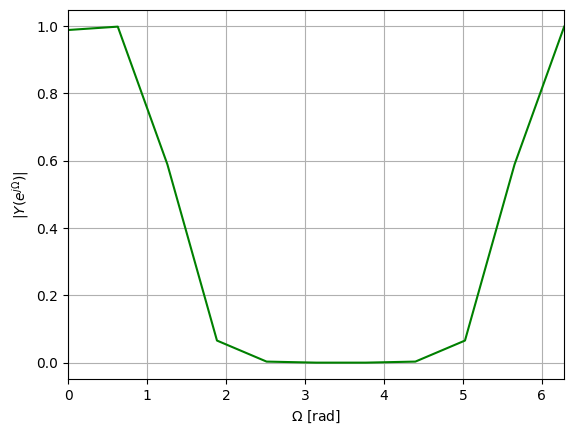

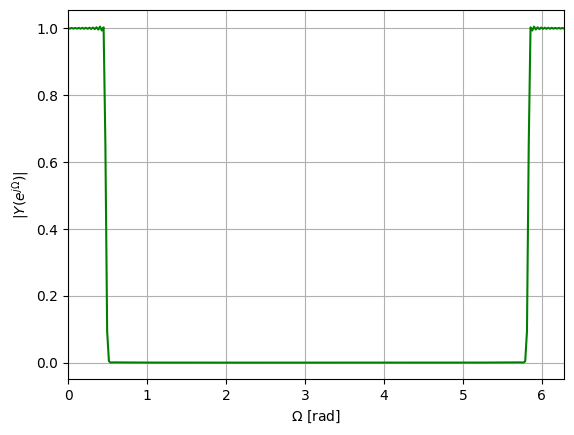

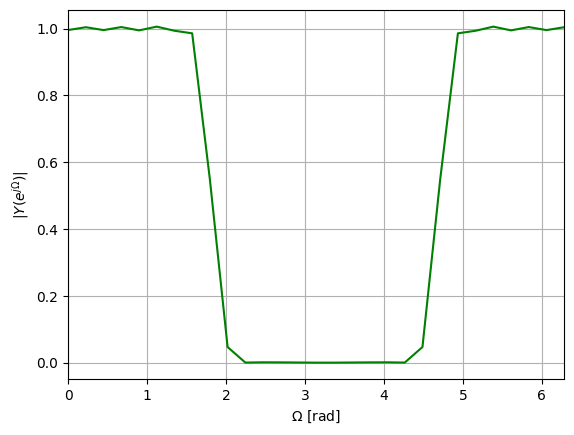

In [10]:
P = [0.45, 0.45, 1.5]
R = [2, 0.5, 2]
for i in range(3):
    h = kaiser(P[i], R[i]) 
    espectro(h)

# Grafico d

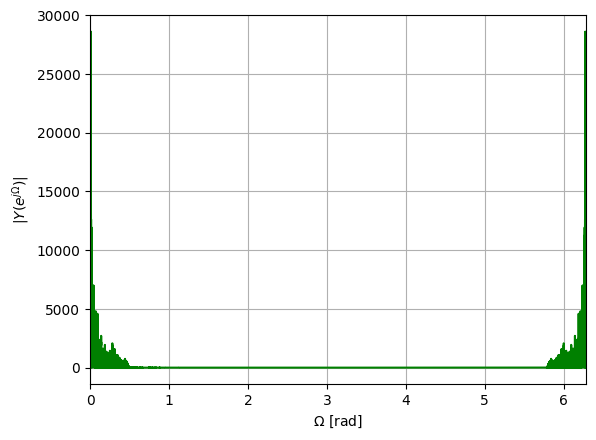

In [11]:
P = 0.45
R = 0.5
h = kaiser(P, R) 
Y = np.convolve(y_mono,h)
espectro(Y)
ipd.Audio(data=Y, rate=Fs)

# Grafico E

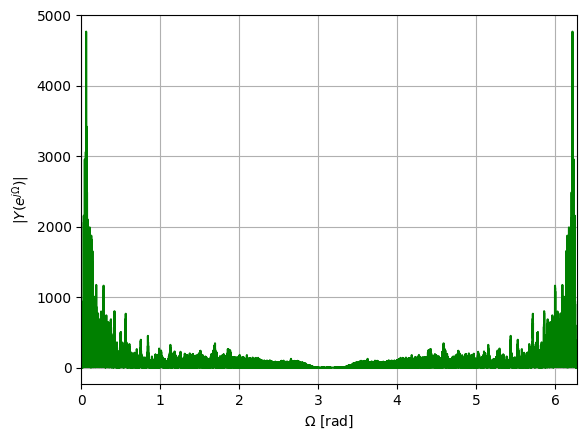

In [12]:
M = 6
# Pega tudo com um passo de M
Y_dec = Y[::M]

espectro(Y_dec)

ipd.Audio(data=Y_dec, rate=Fs_dec)

# Gráfico F

fe: 11.666666666666668 Hz


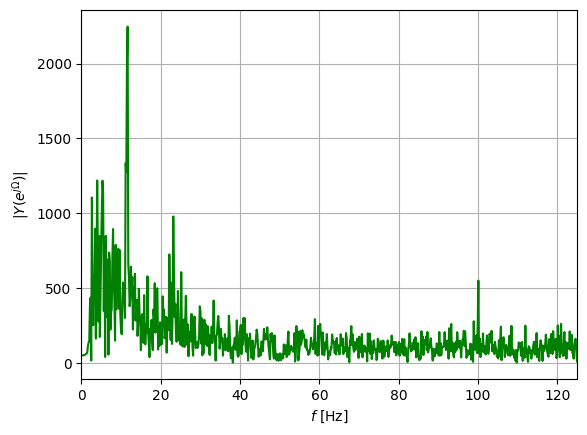

In [ ]:
file = open('EEG.txt')
vals = np.asarray([float(x) for x in fil.read().split()])
file.close()

Y = np.abs(np.fft.fft(vals))
w = np.linspace(0,250,Y.size)

#exibe o grafico do espectro
lista = [Y[i] for i in range(np.shape(Y)[0]//2)]
k = np.argmax(lista)
fe = (k/Y.size) * 250
print("fe:", fe, "Hz")

plt.figure() 
plt.plot(w,Y, 'g')
plt.xlabel('$f$ [Hz]', fontsize=10)
plt.ylabel('|$Y(e^{j\Omega})$|', fontsize=10)
plt.grid(True)
plt.xlim((0,125))
plt.show()